# Prediction of the Success of Bank Telemarketing

# Bussiness Problem



#### Marketing team in a bank is one of the core teams for the upliftment of the organization. They will create a lot of impact on the development of the bank and the first step of the growth in any bank will be started by the marketing team.

#### Marketing is the process of presenting a product or service to the market, promoting it, and encouraging consumers to make purchases. The key to a successful business nowadays is effective marketing, and marketing profoundly affects our day-to-day lives. 

#### The data refers to direct marketing initiatives carried out by a bank in Portugal, the marketing initiatives were centered on phone calls, it was occasionally essential to have many conversations with the same client to ascertain if the product bank term deposit would be subscribed (yes) or not (no).


# Importing all Required Libraries

In [90]:
# import packages
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as pltB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score ,f1_score,classification_report, make_scorer,recall_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.utils import resample
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler

# Loading the dataset

In [91]:
df = pd.read_csv('bank.csv') #loading data

# Explore the dataset

In [92]:
df.head() # checking first 5 columns

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [93]:
df.shape # checking number of rows and columns

(45211, 17)

In [94]:
df.columns #chcecking column names

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [95]:
df.describe() #Statistical Summary of columns

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [96]:
df.info() #information abour data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Cleaning the dataset 

In [97]:
df.columns = [s.strip().replace(' ', '_') for s in df.columns] #replacing colums names which has spaces with the "_"

#### We have changed the coloumn names here in a more readable and reliable way by adding an underscore in between the spaces. This will be more lookable and ideal.

In [98]:
df.isna().sum() #Checking for null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### From the above output, we could see that We do not have any NA values in dataset.

In [99]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [103]:
Category_Features=['job','marital','education','default','housing','loan','contact','month','poutcome']

#### We are grouping all the object type variables into a list here to change their datatype to category which is feasible to find the relationship between the variables.

# Transforming the dat


In [104]:
#lopping through every category.
for i in Category_Features+['y']:
    df[i] = df[i].astype('category') #Casting from object class to category class.
df.dtypes #Cheching all columns Data types.

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [105]:
enc = OrdinalEncoder() #Creating instace of OrdinalEncoder.
for i in Category_Features:
    df[i]=enc.fit_transform(df[[i]]) #Coverting to numerical.
df.dtypes #Cheching all columns Data types.

age             int64
job           float64
marital       float64
education     float64
default       float64
balance         int64
housing       float64
loan          float64
contact       float64
day             int64
month         float64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome      float64
y            category
dtype: object

#### Here, we will perform the ordinal encoding on the predictor categorical variable to encode them to numerical.

In [106]:
target = 'y'
predictors = list(df.columns) #Assigning Predictors and coverting pandas series object to list.
predictors.remove(target)
#LableEncoding for target variable
enc = LabelEncoder() 
df[target]=enc.fit_transform(df[target])
df.dtypes

age            int64
job          float64
marital      float64
education    float64
default      float64
balance        int64
housing      float64
loan         float64
contact      float64
day            int64
month        float64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome     float64
y              int32
dtype: object

#### Performing Label encoding on the target variables to turn the categorical variables to numerical.

# Splitting the data into training and validation sets

In [107]:
X=df[predictors]
y=df[target]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

#### We are splitting the data into training and test here. The training takes 70% of the population data, whereas test takes the remaining 30%. 

# Data Balancing

In [108]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)
train_X, train_y = undersample.fit_resample(train_X, train_y)
train_y.value_counts()

0    3738
1    3738
Name: y, dtype: int64

#### Since, the data is not balanced with respect to the target variable, we have performed the undersampling on the data to avoid the discrepancy between observations for the target.

In [109]:
for i in Category_Features: #Removing 
    predictors.remove(i)
predictors #Checking Predictors list.
train_X[predictors]

,age,balance,day,duration,campaign,pdays,previous
0,26,0,6,320,3,-1,0
1,30,0,8,320,1,-1,0
2,35,0,5,310,1,-1,0
3,32,0,19,188,2,-1,0
4,33,0,20,190,2,-1,0
...,...,...,...,...,...,...,...
7471,25,-191,19,958,7,-1,0
7472,35,1162,30,175,1,-1,0
7473,32,1138,4,214,3,83,3
7474,61,1853,10,520,1,181,2


#  Standardzation of quantitative features

In [110]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(train_X[predictors])

# Transform the predictors of training, validation and newCustomer
train_scaled_data= scaler.transform(train_X[predictors])
test_scaled_data = scaler.transform(test_X[predictors])


In [111]:
s=0
for i in predictors:
    train_X[i]=train_scaled_data[:,s]
    test_X[i]=test_scaled_data[:,s]
    s=s+1
train_X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.228237,1.0,1.0,1.0,0.0,-0.350235,1.0,0.0,0.0,-1.131881,8.0,-0.215488,0.361253,-0.381633,-0.318787,3.0
1,-0.880235,1.0,0.0,1.0,0.0,-0.350235,0.0,1.0,0.0,-0.883172,5.0,-0.215488,-0.653867,-0.381633,-0.318787,3.0
2,-0.445232,4.0,1.0,2.0,0.0,-0.350235,1.0,0.0,0.0,-1.256235,8.0,-0.245237,-0.653867,-0.381633,-0.318787,3.0
3,-0.706234,1.0,1.0,1.0,0.0,-0.350235,1.0,0.0,0.0,0.484726,9.0,-0.608172,-0.146307,-0.381633,-0.318787,3.0
4,-0.619233,4.0,2.0,1.0,0.0,-0.350235,0.0,0.0,2.0,0.609080,8.0,-0.602223,-0.146307,-0.381633,-0.318787,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7471,-1.315238,1.0,2.0,1.0,0.0,-0.417122,1.0,0.0,2.0,0.484726,6.0,1.682487,2.391493,-0.381633,-0.318787,3.0
7472,-0.445232,4.0,2.0,2.0,0.0,0.056685,0.0,0.0,0.0,1.852624,0.0,-0.646846,-0.653867,-0.381633,-0.318787,3.0
7473,-0.706234,8.0,2.0,2.0,0.0,0.048281,0.0,0.0,0.0,-1.380590,8.0,-0.530825,0.361253,0.544559,1.346658,2.0
7474,1.816783,5.0,1.0,1.0,0.0,0.298667,0.0,0.0,1.0,-0.634463,1.0,0.379488,-0.653867,1.625115,0.791509,2.0


In [112]:
Algorithms = ['knn','knn','DecisionTree','DecisionTree','RandomForest','RandomForest','AdaBoostClassifier','AdaBoostClassifier','GradientBoosting','GradientBoosting','XGBClassifier','XGBClassifier','LogisticRegression','LogisticRegression']
Recall_values =[]

#### Since, continuous variables are measured in different scales we performed standardization to get them into the same scale. Here we have performed the same on train_predictors and validation_predictors. Firstly, we have removed our categorical variables and the target variable, because we should not perform standardization on them. Later, we will append those category features list to the standardized dataframe. Finally, we get a standardized dataframe.

#### False Positive: The actual outcome was that the client did not subscribe to the product, but the model predicted that the customer would. The concern here is that the marketing team will target consumers that do not need to be targeted. The campaign team wastes time and effort, while the client is bombarded with advertisements that are unnecessary.

#### False Negative: The actual outcome was that the client subscribed to the product, but the model predicted that the customer would not subscribe to the product. As a result, the bank will suffer a significant loss because they are missing one of their investors for the product.

#### Here, FP is preferable over FN since we have less loss with false positive than with false negatives, thus we will concentrate on 'Recall'.


# Prediction with K-NN

In [113]:
knn = KNeighborsClassifier()
_ = knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))

Using default parameters : Recall score:
0.8079


#### We have applied the K-nn model on our training dataset which is actually splitted from the original dataset and found the recall value to be 0.8079.

In [114]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
     'n_neighbors': list(range(1,round(np.sqrt(len(df))),2)),
    'metric': ['euclidean', 'cosine','manhattan','minkowski'],
    'weights':['uniform','distance']
}
best_grid_search_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1,error_score='raise')  # n_jobs=-1 will utilize all available CPUs 
_=best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)

Best_recall_knn = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

recall score:  0.8111410589095497
parameters:  {'metric': 'cosine', 'n_neighbors': 3, 'weights': 'distance'}


#### From the above observations we can depict that the best value of k is found to be at k=3 with the recall of around 81% by using cosine metric. Where recall is improved when compared to before after performing k fold which means it has improved model performance.

In [115]:
# create the training set and the test set 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [116]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)
train_X, train_y = undersample.fit_resample(train_X, train_y)
train_y.value_counts()

0    3738
1    3738
Name: y, dtype: int64

# Decision Tree 

In [117]:
#Decision Tree 
dtree=DecisionTreeClassifier(random_state=3)
_ = dtree.fit(train_X, train_y)
y_pred = dtree.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))

Using default parameters : Recall score:
0.8839


In [118]:
score_measure = 'recall'
k_fold = 10

param_grid = {

    'criterion':  ['gini','entropy','log_loss'],
    'max_depth':  [2]+list(range(5,50,5)),
     'min_samples_leaf': range(2,len(train_X.columns),1) , 
     'min_samples_split': range(2,len(train_X.columns),1)
    

}

best_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,cv=k_fold, n_jobs=-1,verbose=1,scoring=score_measure)

_ = best_grid_search_model.fit(train_X, train_y)

print(score_measure, 'score: ', best_grid_search_model.best_score_)

print('parameters: ', best_grid_search_model.best_params_)
Best_recall_DT = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

Fitting 10 folds for each of 5880 candidates, totalling 58800 fits
recall score:  0.892458889478287
parameters:  {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 7, 'min_samples_split': 3}


#### Here after performing the analysis on the splitted data, we were able to get the value of the performace metrics here and found that the recall is found to be around 88% for decision tree, and after performing k- fold it increased its recall rate from 88% to 89%. Eventhough this model took more time for computations than the above, this provided the best reult than the prior models.

# Random Forest

In [119]:
#Random Forest
rforest = RandomForestClassifier(random_state=1)
_ = rforest.fit(train_X, train_y)
y_pred = rforest.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))

Using default parameters : Recall score:
0.8994


In [120]:
score_measure = 'recall'
k_fold = 10

param_grid = {
    "n_estimators": range(20,60,20),
    'max_features':['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
    'max_depth': [20,40],
    'bootstrap': [True],

         }
best_grid_search_model = GridSearchCV(estimator=RandomForestClassifier(random_state=1), 
                                    scoring=score_measure, param_grid=param_grid, cv=k_fold, verbose=1,  n_jobs = -1,error_score='raise')
_ = best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_recall_RF = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
recall score:  0.9114500150535477
parameters:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}


C:\Users\dsksr\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


#### We are performing random forest on the dataset to check for the further best results if possible.
#### The Parameters that we have used here are :
#### 1. bootstrap : It takes the values of either true or false. If true, it takes the splitted data to build each tree.
#### 2. n_estimators : Number of trees we want to build before taking the maximum averages of predictions. Though, higher number of trees improves the performance, it will make the code to run slower. We have taken an ideal range of 20 to 100.
#### 3. max_features : The maximum number of features Random Forest is allowed to try in individual tree.
#### 4. max_depth : Here, we have considered the longest path between the root node and leaf node in a list.
#### 5. min_samples_leaf : the bare minimum of samples that must be present at a leaf node.
#### 6. min_samples_split : It is the minimum number of samples required to split an internal node.
#### By calling the Random forest function setting all of these parameters, we could find the optimal model at the 'max_depth': 20, 'max_features': 0'max_samples': 0.5, 'n_estimators': 20 with an accuracy of 0.9114500150535477.

# AdaBoostClassifier

In [121]:

#AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=3)
_ = adaboost.fit(train_X, train_y)
y_pred = adaboost.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))



Using default parameters : Recall score:
0.8910


In [122]:
score_measure = 'recall'
k_fold = 10
param_grid = {
             'learning_rate': [0.7,0.8,0.9,1.0],
           'n_estimators': range(1,50,1)
              }
best_grid_search_model = GridSearchCV(estimator=AdaBoostClassifier(random_state=3),
                                    scoring=score_measure, param_grid=param_grid, cv=k_fold, verbose=1,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_recall_AdaBoost = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

Fitting 10 folds for each of 196 candidates, totalling 1960 fits
recall score:  0.9047698240885435
parameters:  {'learning_rate': 1.0, 'n_estimators': 45}


#### The default adaboost model has a recall score of 0.9047698240885435. We customized adaboost using the two most critical parameters: n estimators and learning rate.
- #### n_estimators : Number of trees we want to build before taking the maximum averages of predictions. Though, higher number of trees improves the performance, it will make the code to run slower. We have taken an ideal range of 1 to 50.
- #### learning rate: learning rate represents each model's contribution to the weights and is set to 1 by default. When the learning rate is reduced, the weights are slightly increased or lowered, causing the model train to go slower (but sometimes resulting in better performance scores).
#### After performing hyperparameter adjustment with a k-fold value of 10, we achieved the best model with parameters 'learning rate': 1.0, 'n estimators': 45, and recall of : 0.9047698240885435.

# GradientBoosting

In [123]:
#GradientBoosting
gboost = GradientBoostingClassifier(random_state=3)
_ = gboost.fit(train_X, train_y)
y_pred = gboost.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))



Using default parameters : Recall score:
0.9001


In [124]:
score_measure = 'recall'
k_fold = 10
param_grid ={ 'n_estimators' : [25, 50 ,75, 100, 200],
              'learning_rate': [0.005 ,0.05, 0.5, 1.5,2],
              'max_depth': [2, 4, 6, 8],
              }
best_grid_search_model = GridSearchCV(estimator=GradientBoostingClassifier(random_state=3), 
                                    scoring=score_measure, param_grid=param_grid, cv=k_fold, verbose=1,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_recall_GB = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
recall score:  0.9235100572034808
parameters:  {'learning_rate': 1.5, 'max_depth': 2, 'n_estimators': 25}


#### Gradient boosting is a powerful technique for developing predictive models. It can benefit from regularization methods that penalize different parts of the algorithm and improve overall algorithm performance by reducing overfitting.
#### Tunign n_estimators, Learning rate and max_depth:
- #### The number of trees we add to the model is recorded by the variable n estimators. It can be costly computationally to process many trees. In general, n estimators should be changed to reflect changes in learning rate (a 10-fold drop in learning rate should correspond to an approximately 10-fold increase in n_estimators).
- #### It can be said from the low learning_rate value of 0.05 that the n_estimators value is going to be high that seems to be the case as the best n_estimators ended up being : 100.
- #### max_depth. This indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. 
#### The Gradiant Boosting model tends to overfit the data and got a recall score of 0.9235100572034808. We have tuned gradiant boosting on the maximum depth that we allow the tree to grow, After performing hyperparameter tuning we got the best model at learning_rate': 1.5 , 'max_depth': 2, n_estimators': 25, with recall score: 0.9235100572034808.

# XGBClassifier

In [125]:
#XGBClassifier
xgboost = XGBClassifier(random_state=1)
_ = xgboost.fit(train_X, train_y)
y_pred = xgboost.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))



Using default parameters : Recall score:
0.9181


In [126]:
score_measure = 'recall'
k_fold = 10
param_grid = {
            
    'n_estimators': [80, 100, 250, 500, 750],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 6, 10, 15],
            
}

           
best_grid_search_model = GridSearchCV(estimator=XGBClassifier(random_state=1), 
                                    scoring=score_measure, param_grid=param_grid, cv=k_fold, verbose=1,  n_jobs = -1)
_ = best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_recall_XGB = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
recall score:  0.9141273960229961
parameters:  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 80}


#### Extreme Gradient Boosting (XGBoost) is a distributed, scalable gradient-boosted decision tree (GBDT) machine learning framework. The top machine learning library for regression, classification, and ranking issues, it offers parallel tree boosting.
#### Here we used max depth, learning_rate, and n_estimators as parameters. Max depth is the maximum depth of the tree. learning_rate parameter can be set to control the weighting of new trees added to the model. n estimators are the number of runs the model will try to learn. After hyper tuning, the best values for parameters are max depth: 6, learning rate: 0.2, and n estimators:80. Hence, we obtained the recall = 0.9141273960229961.

# LogisticRegression

In [127]:
logClassifier=LogisticRegression(random_state=1)

_ = logClassifier.fit(train_X,train_y)
y_pred = logClassifier.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.
Recall_values.append(recall_score(test_y,y_pred))

Using default parameters : Recall score:
0.8343


C:\Users\dsksr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
score_measure = 'recall'
k_fold = 10
param_grid = { 'solver': ['liblinear'],
                      'penalty': ['l1', 'l2',], # NOTE: 'elasticnet' is only supported by 'saga' solver
                      'C': [100, 10, 1.0],
                      'max_iter': [1000,2500, 5000] # number of iterations to converge (sometimes the default is not enough - and sometimes, it will never converge)
                     }




best_grid_search_model = GridSearchCV(estimator=LogisticRegression(random_state=1),
                                    scoring=score_measure, param_grid=param_grid, 
                                    cv=k_fold, verbose=0,  n_jobs = -1,error_score='raise')
_ = best_grid_search_model.fit(train_X, train_y)
print(score_measure, 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)
Best_recall_logistic = best_grid_search_model.best_score_
Recall_values.append(best_grid_search_model.best_score_)

recall score:  0.8526071310805581
parameters:  {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


#### To find the best parameters, we have performed tuning for the following variables:
- C - float, default=1.0 Inverse of regularization strength; must be a positive float.
- penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=l2
 
            1. none: no penalty is added;
            2. l2: add a L2 penalty term and it is the default choice;
            3. l1: add a L1 penalty term;
            4. elasticnet: both L1 and L2 penalty terms are added.
- solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

            1. For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
            2. For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
            3. liblinear is limited to one-versus-rest schemes.
        
- max_iterint, default=100 ,Maximum number of iterations taken for the solvers to converge.

#### After performing hyperparameter tuning when k-fold value is 10, we got the best model at 'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear' with recall score: 0.8526071310805581. 

In [129]:
print("Recall scores...")
print(f"{'K-NN:':11}          {Best_recall_knn}")
print(f"{'Decision Tree:':11}       {Best_recall_DT}")
print(f"{'Random Forest:':11}       {Best_recall_RF}")
print(f"{'Ada Boosted:':11}         {Best_recall_AdaBoost}")
print(f"{'GradientBoosting:':11}    {Best_recall_GB}")
print(f"{'XGBoost:':11}          {Best_recall_XGB}")
print(f"{'LogisticRegression:':11}  {Best_recall_logistic}")

Recall scores...
K-NN:                0.8111410589095497
Decision Tree:       0.892458889478287
Random Forest:       0.9114500150535477
Ada Boosted:         0.9047698240885435
GradientBoosting:    0.9235100572034808
XGBoost:             0.9141273960229961
LogisticRegression:  0.8526071310805581


In [130]:
score_df = pd.DataFrame(list(zip(Algorithms, Recall_values)),
               columns =['Algorithm', 'Recall'])
score_df
score_df['state']=['Default','After_tunning']*7

In [131]:
score_df

,Algorithm,Recall,state
0,knn,0.807866,Default
1,knn,0.811141,After_tunning
2,DecisionTree,0.883946,Default
3,DecisionTree,0.892459,After_tunning
4,RandomForest,0.899420,Default
5,RandomForest,0.911450,After_tunning
6,AdaBoostClassifier,0.891038,Default
7,AdaBoostClassifier,0.904770,After_tunning
8,GradientBoosting,0.900064,Default
9,GradientBoosting,0.923510,After_tunning


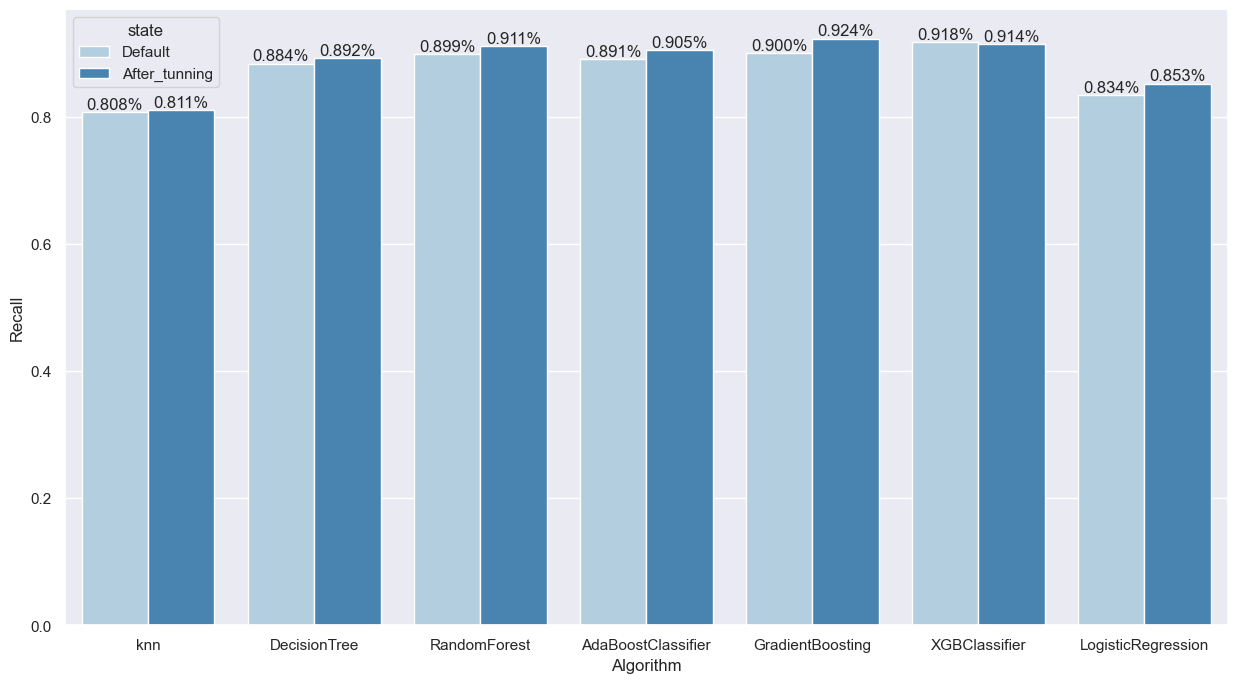

In [132]:
sns.set(rc = {'figure.figsize':(15,8)})
ax= sns.barplot(x = 'Algorithm',
            y = 'Recall',
            hue='state',
            data = score_df,palette = "Blues",ci=None)
for i in ax.containers:
     ax.bar_label(i,fmt='%.3f%%')
# Show the plot
plt.show()

#### From the above table and the graph, we could come up with a conclusion and see the overall recall score that obtained after performing model evaluation and found that Gradient Boosting provides the optimal result of all with a recall score of 0.923510 after performing the hyperparameter tuning, followed by XGBoost classifier. 

# Business Conclusion

In [133]:
#GradientBoosting
gboost = GradientBoostingClassifier(random_state=3,learning_rate= 0.2, max_depth= 6, n_estimators= 80)
_ = gboost.fit(train_X, train_y)
y_pred = gboost.predict(test_X)
print(f"Using default parameters : Recall score:\n{recall_score(test_y,y_pred):.4f}")#Checking model Recall score.


Using default parameters : Recall score:
0.9123


- #### Since FP is preferable over FN here, we are focusing on the recall here. The recall is found to be improving by applying the Gradient boosting model and also provides an optimal output here.
- #### We have noticed that after implementing K- Fold cross validation as well as Hyper parameter tuning, we have found that the recall of the models have been improved. 
- #### Overall, Gradient Boosting turned out to be better model.In conclusion, methods like K- Fold cross validation as well hyper parameter tuning, are extremely useful in improving the quality of outputs for binary classification model generation.
- #### Gradient Boosting model captured most of the actual positives. This will help the bank to limit thier cost on the marketing and also generate their revenue better by targetting the relevant customers that will most probably take the term deposit policy rather than those who were not interested.
- #### By looking at the past analysis on this problem, we could see that the previous noted people who have worked on this business problem has got a recall score of 79% after applying support vector machines algorithm. We have made it even more optimal comparitively and found the recall score higher than the previous work.